Performs multiple linear regression. It's up to you to find the most relevant X's variables. The target (y) will be the price column.

Remember to train-test-split your dataset to get a relevant score, and print your test-set R2-score.

The last 4 rows doesn't have price. You'll have to predict prices and print your prediction.

#Import modules

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, max_error

#Import dataset

In [0]:
link = 'https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv'

In [0]:
house_sales = pd.read_csv(link)
house_sales.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [0]:
house_sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,NaN,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# A look on most relevant variables with visualisations

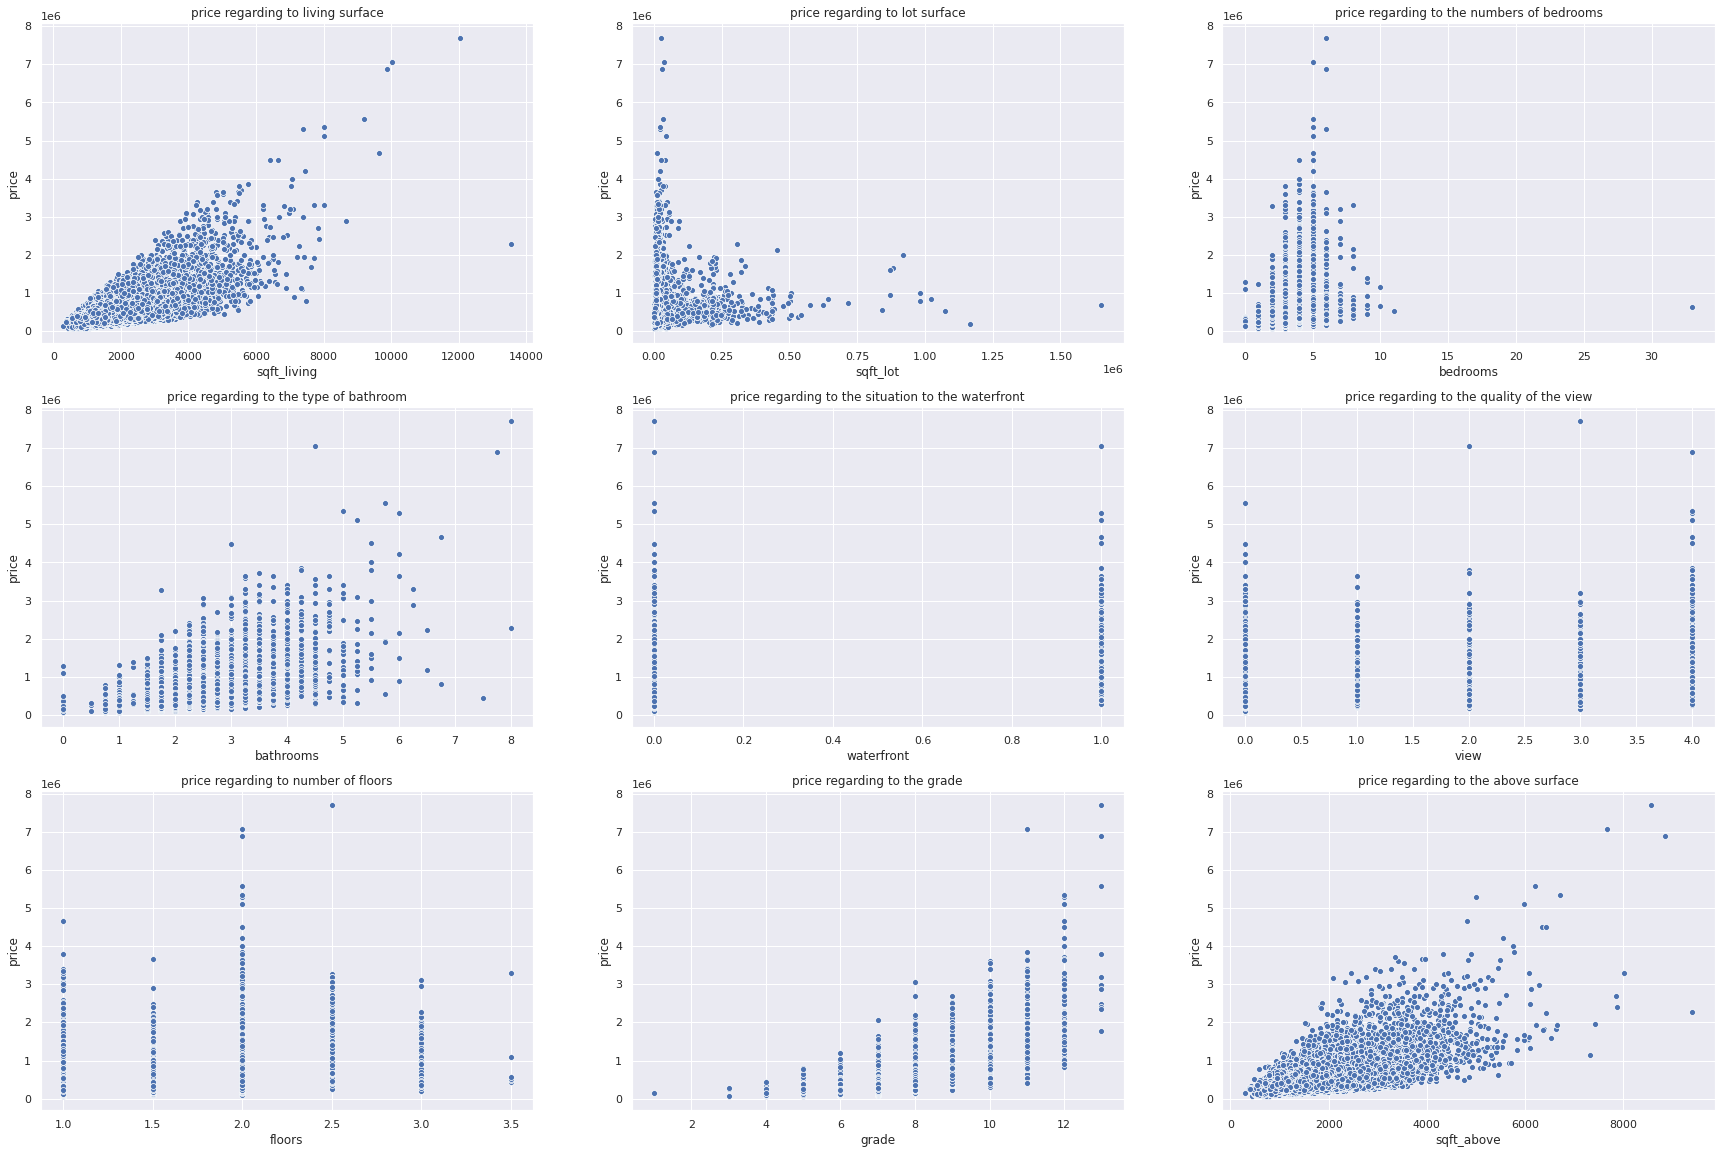

In [0]:
plt.figure(figsize=(30, 20))

plt.subplot(331)
sns.scatterplot(data=house_sales, x='sqft_living', y='price')
plt.title('price regarding to living surface')

plt.subplot(332)
sns.scatterplot(data=house_sales, x='sqft_lot', y='price')
plt.title('price regarding to lot surface')

plt.subplot(333)
sns.scatterplot(data=house_sales, x='bedrooms', y='price')
plt.title('price regarding to the numbers of bedrooms')

plt.subplot(334)
sns.scatterplot(data=house_sales, x='bathrooms', y='price')
plt.title('price regarding to the type of bathroom')

plt.subplot(335)
sns.scatterplot(data=house_sales, x='waterfront', y='price')
plt.title('price regarding to the situation to the waterfront')

plt.subplot(336)
sns.scatterplot(data=house_sales, x='view', y='price')
plt.title('price regarding to the quality of the view')

plt.subplot(337)
sns.scatterplot(data=house_sales, x='floors', y='price')
plt.title('price regarding to number of floors')

plt.subplot(338)
sns.scatterplot(data=house_sales, x='grade', y='price')
plt.title('price regarding to the grade')

plt.subplot(339)
sns.scatterplot(data=house_sales, x='sqft_above', y='price')
plt.title('price regarding to the above surface')

plt.show()

In [0]:
house_sales.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001286,0.308330,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525168,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702040,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089639,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256894,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266367,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397280,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036314,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [0]:
house_sales.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702040
grade            0.667444
sqft_above       0.605574
sqft_living15    0.585372
bathrooms        0.525168
view             0.397280
sqft_basement    0.323782
bedrooms         0.308330
lat              0.307012
waterfront       0.266367
floors           0.256894
yr_renovated     0.126420
sqft_lot         0.089639
sqft_lot15       0.082420
yr_built         0.054123
condition        0.036314
long             0.021601
id              -0.016826
zipcode         -0.053150
Name: price, dtype: float64

In [0]:
house_sales.corr()['price'].sort_values(ascending=False).index

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode'],
      dtype='object')

#Multivariate regression and prediction

**SPLIT**

In [0]:
  Xm = house_sales[~house_sales['price'].isna()][[ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']]                                                                   
  ym= house_sales[~house_sales['price'].isna()]['price']
  Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.20, random_state=42)

**TRAIN**

In [0]:
modelLR_multi = LinearRegression()
modelLR_multi.fit(Xm_train, ym_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**TEST AND SCORE**

In [0]:
# prediction sur X_test
y_pred =  modelLR_multi.predict(Xm_test)

#R2 Score
r2_score(ym_test, y_pred)

0.701736411692363

In [0]:
#other metrics
max_error(ym_test, y_pred)

3238654.3456272036

**PREDICTION**

In [0]:
Xp = house_sales[house_sales['price'].isna()][[ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']]

In [0]:
predict = modelLR_multi.predict(Xp)
predict

array([434615.73311267, 149731.62976252, 393807.98252107, 152438.3218448 ])

**VISUALISATION**

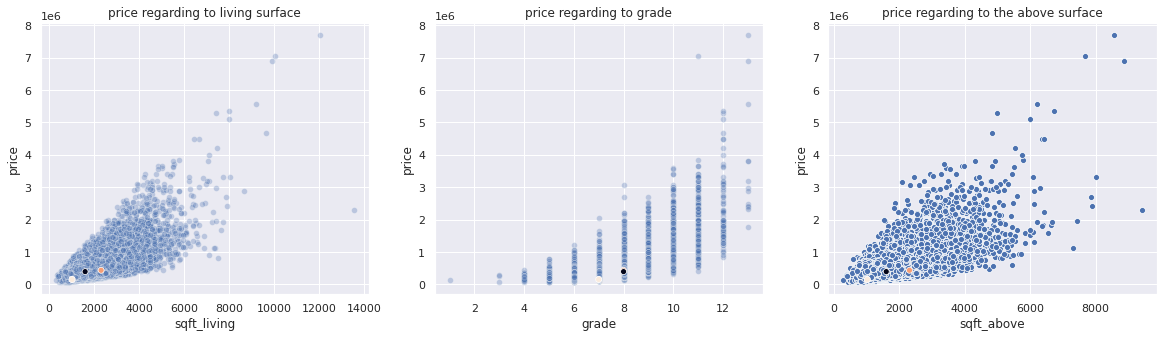

In [0]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.scatterplot(data=house_sales[~house_sales['price'].isna()], x='sqft_living', y='price', alpha=0.3)
sns.scatterplot(data=house_sales[house_sales['price'].isna()], x='sqft_living', y=predict,palette="Set2")
plt.title('price regarding to living surface')

plt.subplot(132)
sns.scatterplot(data=house_sales[~house_sales['price'].isna()], x='grade', y='price', alpha=0.3)
sns.scatterplot(data=house_sales[house_sales['price'].isna()], x='grade', y=predict,palette="Set2")
plt.title('price regarding to grade')

plt.subplot(133)
sns.scatterplot(data=house_sales[~house_sales['price'].isna()], x='sqft_above', y='price')
sns.scatterplot(data=house_sales[house_sales['price'].isna()], x='sqft_above', y=predict, palette="Set2")
plt.title('price regarding to the above surface')

plt.show()

**FILL DATAFRAME AND PRINT RESULT**

In [0]:
predict

array([434615.73311267, 149731.62976252, 393807.98252107, 152438.3218448 ])

In [0]:
i = 0
for index, value in house_sales[house_sales['price'].isna()]['price'].items() : 
  house_sales.loc[index, 'price'] = predict[i]
  i+=1

In [0]:
house_sales.tail(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,20150223T000000,434615.733113,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,149731.629763,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,393807.982521,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,152438.321845,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357
